In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go # 그래프 객체 생성
from plotly.subplots import make_subplots
import datetime
import seaborn as sns 
import scipy.stats
import plotly.express as px
import os 
from scipy import stats
from sklearn import metrics
import statsmodels.formula.api as smf
import scipy.stats as st
import pylab
import csv

os.getcwd()

'c:\\Users\\seong\\Desktop\\Enittproj\\Enitt'

In [2]:
## merge 1, 2 데이터
data1 = pd.read_csv("./ENITT_SOLAR_DATA/ENITT_SOLAR_DATA/A463. 전북대 New REC 발전량.csv", encoding="ms949")
data2 = pd.read_csv("./ENITT_SOLAR_DATA/ENITT_SOLAR_DATA/463. 전북대NewREC 발전량.csv", encoding="ms949")
data3 = pd.read_csv("./ENITT_SOLAR_DATA/ENITT_SOLAR_DATA/A463. 전북대 New REC 환경센서.csv", encoding="ms949")
data4 = pd.read_csv("./ENITT_SOLAR_DATA/ENITT_SOLAR_DATA/463. 전북대NewREC 환경정보.csv", encoding="ms949")



data_12 = pd.concat([data2, data1])
data_34 = pd.concat([data4, data3])
ent_data_solar = data_12.reset_index().drop('index', axis=1)
ent_data_solar

ent_data_weather = data_34.reset_index().drop('index', axis=1)
ent_data_weather

,env_index,env_date,env_time,env_slopesolar,env_levelsolar,env_modtemp,env_airtemp
0,1,2018-11-19,15:13:12,289,443,21.2,14.6
1,2,2018-11-19,15:14:04,288,441,21.2,14.8
2,3,2018-11-19,15:14:56,284,436,21.2,14.8
3,4,2018-11-19,15:15:48,282,432,21.2,14.9
4,5,2018-11-19,15:16:40,281,431,20.8,14.9
...,...,...,...,...,...,...,...
723073,723074,2020-10-22,23:33:48,0,0,10.3,11.3
723074,723075,2020-10-22,23:34:46,0,0,10.3,11.4
723075,723076,2020-10-22,23:35:43,0,0,10.3,11.4
723076,723077,2020-10-22,23:36:41,0,0,10.4,11.4


In [3]:
## 파일불러오기 ( 추가데이터 포함되어 있는 것은 제외 )
# def ent_loadfile(solar_path, weather_path):
#     ent_data_solar = pd.read_csv(solar_path)
#     ent_data_weather = pd.read_csv(weather_path)

#     return ent_data_solar, ent_data_weather


# ent_data_solar, ent_data_weather = ent_loadfile(
#     "./ENITT_SOLAR_DATA/ENITT_SOLAR_DATA/A365. 반포써밋2블럭 발전량.csv", 
#     "./ENITT_SOLAR_DATA/ENITT_SOLAR_DATA/A365. 반포써밋2블럭 환경센서.csv")

# ent_data_solar["pow_date"].unique() ## 약 2018-11-26~ 2020-03-02 
# ent_data_weather["env_date"].unique() ## 약 2018-11-26 ~ 2020-03-03  

# -> low data인 환경정보로 정리 필요 // 

## 외부데이터 불러오기 
def other_loadfile(a, b, c): ## 임의로 수정 필요 
    other_data_dummy1 = pd.read_csv(a, encoding="ms949")
    other_data_dummy2 = pd.read_csv(b, encoding="ms949")
    other_data_dummy3 = pd.read_csv(c, encoding="ms949")

    return other_data_dummy1, other_data_dummy2, other_data_dummy3

other_data_dummy1, other_data_dummy2, other_data_dummy3 = other_loadfile(
    "./ENITT_SOLAR_DATA/re_allweather/allweather2018.csv",
    "./ENITT_SOLAR_DATA/re_allweather/allweather2019.csv",
    "./ENITT_SOLAR_DATA/re_allweather/allweather2020.csv")


other_data_dummyall = other_data_dummy1.merge(other_data_dummy2, how="outer").merge(other_data_dummy3, how="outer")
other_data_weather = other_data_dummyall[other_data_dummyall["지점명"] == "목포"]
other_data_weather["지점명"].unique()

other_data_dummy1 = pd.read_csv("./ENITT_SOLAR_DATA/otherdata/otherdata.csv", encoding="ms949")
other_data_solar = other_data_dummy1[other_data_dummy1["발전기명"] == "안산연성정수장태양광"]
other_data_solar["발전기명"].unique()
# 2019-06-16 13:00
# ent_data_weather.loc[ent_data_weather["env_date"] == "2019-06-16"]

# print()
ent_data_solar1 = ent_data_solar[ent_data_solar["pow_id"] == 1]
ent_data_weather


,env_index,env_date,env_time,env_slopesolar,env_levelsolar,env_modtemp,env_airtemp
0,1,2018-11-19,15:13:12,289,443,21.2,14.6
1,2,2018-11-19,15:14:04,288,441,21.2,14.8
2,3,2018-11-19,15:14:56,284,436,21.2,14.8
3,4,2018-11-19,15:15:48,282,432,21.2,14.9
4,5,2018-11-19,15:16:40,281,431,20.8,14.9
...,...,...,...,...,...,...,...
723073,723074,2020-10-22,23:33:48,0,0,10.3,11.3
723074,723075,2020-10-22,23:34:46,0,0,10.3,11.4
723075,723076,2020-10-22,23:35:43,0,0,10.3,11.4
723076,723077,2020-10-22,23:36:41,0,0,10.4,11.4


In [4]:
## DELETE COLUMN AND EDIT COLUMN

## '지점', '지점명', '일시', '기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)','일조(hr)', '일사(MJ/m2)', '적설(cm)', '전운량(10분위)', '10cm 지중온도(°C)'
#=>

## '기온', '강수량', '풍속', '풍향', '습도', '일조', '일사', '전운량', '지면온도'
reset_other_weather = other_data_weather.set_index("일시")
reset_other_weather_need = reset_other_weather[['기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)','일조(hr)', '일사(MJ/m2)', '적설(cm)', '전운량(10분위)', '10cm 지중온도(°C)']]
reset_other_weather_need.columns = ['기온', '강수량', '풍속', '풍향', '습도', '일조', '일사', '적설', '전운량', '지중온도']
reset_other_weather_need.fillna(0, inplace=True)
reset_other_weather_need



,기온,강수량,풍속,풍향,습도,일조,일사,적설,전운량,지중온도
일시,,,,,,,,,,
2018-01-01 00:00,2.3,0.0,1.7,340.0,84.0,0.0,0.0,0.0,8.0,5.2
2018-01-01 01:00,2.3,0.0,2.4,20.0,89.0,0.0,0.0,0.0,0.0,5.1
2018-01-01 02:00,1.9,0.0,1.8,20.0,79.0,0.0,0.0,0.0,0.0,5.0
2018-01-01 03:00,1.6,0.0,2.1,20.0,82.0,0.0,0.0,0.0,5.0,4.9
2018-01-01 04:00,1.4,0.0,1.9,20.0,78.0,0.0,0.0,0.0,7.0,4.8
...,...,...,...,...,...,...,...,...,...,...
2020-10-31 19:00,15.9,0.0,2.7,180.0,60.0,0.0,0.0,0.0,10.0,16.3
2020-10-31 20:00,14.8,0.0,2.4,160.0,64.0,0.0,0.0,0.0,4.0,16.1
2020-10-31 21:00,14.0,0.0,3.3,140.0,66.0,0.0,0.0,0.0,6.0,15.8


In [117]:
## 기업 solar weather EDA -> 필요
ent_data_weather.columns 

# ent_data_weather["env_levelsolar"].describe()
# ent_data_weather["env_slopesolar"].describe()


## 기업 날씨 데이터 1시간 별로 groupby , ( slopesolar, levelsolar => sum) , ( modtemp, airtemp => mean )
def groupby_weather():
    ## time 구분
    dummy_time_list = []
    for i in ent_data_weather["env_time"]:
        dummy_time_list.append(i[:2])

    ent_data_weather["dummy_time"] = dummy_time_list
    dummy_groupbyall = ent_data_weather.groupby(["env_date", "dummy_time"]).mean()
    ent_data_weather_groupby = dummy_groupbyall.reset_index() ## 그룹화된 인덱스 풀기 

    ### 발전량이 거의 없는 데이터 삭제 ( 9~ 19 까지만 살린다)
    drop_data = ent_data_weather_groupby.isin({"dummy_time" : ["00", "01", "02", "03", "04", "05", "06", "07","08", "19", "20", "21", "22", "23"]})
    ent_data_weather_sort = ent_data_weather_groupby[~drop_data].dropna()
    # print(ent_data_weather_sort)
    ent_data_weather_sort.drop("env_index", axis=1, inplace=True)

    return ent_data_weather_sort




## 기업 발전량 데이터 groupby
def groupby_solar():
    ## 필요한 컬럼만 가져오기
    ent_data_need = ent_data_solar1[["pow_date", "pow_time", "pow_totpower"]]

    ## time 구분
    dummy_time_list = []
    for i in ent_data_need["pow_time"]:
        dummy_time_list.append(i[:2])
    ent_data_need["dummy_time"] = dummy_time_list

    dummy_groupby1 = ent_data_need.groupby(["pow_date", "dummy_time"]).min()
    dummy_groupby2 = ent_data_need.groupby(["pow_date", "dummy_time"]).max()

    ## 최대값과 최솟값 차 = 1시간동안 발전한 총용량
    ## 최대값과 최솟값이 같을 경우 = 발전량 0 or 그 시간대 총발전량이 1개밖에 없어 비교 불가능한 경우
    ent_data_perhour = dummy_groupby2["pow_totpower"] - dummy_groupby1["pow_totpower"]
    ent_data_perhour = ent_data_perhour.reset_index()

    ### 발전량이 거의 없는 데이터 삭제 ( 8~ 19 까지만 살린다)
    drop_data = ent_data_perhour.isin({"dummy_time" : ["00", "01", "02", "03", "04", "05", "06", "07","08", "18", "19", "20", "21", "22", "23"]})
    ent_data_perhour_sort = ent_data_perhour[~drop_data].dropna()

    return ent_data_perhour_sort
    # print(ent_data_perhour_sort["dummy_time"].unique())

def groupby_solar_reset():
    ## 필요한 컬럼만 가져오기
    ent_data_need = ent_data_solar1[["pow_date", "pow_time", "pow_dcv", "pow_dca"]]

    ## time 구분
    dummy_time_list = []
    for i in ent_data_need["pow_time"]:
        dummy_time_list.append(i[:2])
    ent_data_need["dummy_time"] = dummy_time_list

    ent_data_need["watt"] = ent_data_need["pow_dcv"] * ent_data_need["pow_dca"]

    ## RESET 발전량 :: 직류 전압 X 직류 전류 : 발전량 ,, GROUPBY해서 직류X전류 의 평균량으로 구한다
    ent_data_perhour = ent_data_need.groupby(["pow_date", "dummy_time"]).mean()
    ent_data_perhour = ent_data_perhour.reset_index()


    drop_data = ent_data_perhour.isin({"dummy_time" : ["00", "01", "02", "03", "04", "05", "06", "07","08","09", "17", "18", "19", "20", "21", "22", "23"]})
    ent_data_perhour_sort = ent_data_perhour[~drop_data].dropna()

    return ent_data_perhour_sort



### weather, solar join
def join_weather_solar(a, b):
    sub_index1 = a["env_date"] + " " + a["dummy_time"] + ":00"
    a.index = sub_index1

    sub_index2 = b["pow_date"] + " " + b["dummy_time"] + ":00"
    b.index = sub_index2

    joinset = a.join(b[["pow_dcv", "pow_dca", "watt" ]])
    ent_data_solar_weather = joinset.dropna()


    return ent_data_solar_weather

ent_data_weather_sort = groupby_weather()
ent_data_perhour_sort = groupby_solar_reset()
ent_data_solar_weather = join_weather_solar(ent_data_weather_sort, ent_data_perhour_sort)
ent_data_solar_weather
# pow_perhour 
# sns.boxplot(ent_data_weather_sort["env_slopesolar"])
# sns.boxplot(ent_data_weather_sort["env_levelsolar"])
# sns.boxplot(data = ent_data_weather_sort[["env_slopesolar", "env_levelsolar"]])
# ent_data_weather_sort[["env_slopesolar", "env_levelsolar"]]

# print(len(joinset) - 2504)
ent_data_solar_weather


,env_date,dummy_time,env_slopesolar,env_levelsolar,env_modtemp,env_airtemp,pow_dcv,pow_dca,watt
2018-11-19 15:00,2018-11-19,15,217.800000,342.600000,18.356000,13.632000,158.137931,6.058621,956.717241
2018-11-19 16:00,2018-11-19,16,72.434783,114.275362,11.605797,10.982609,148.144928,1.752174,272.220290
2018-11-20 10:00,2018-11-20,10,482.628571,700.400000,19.031429,10.270000,156.666667,12.120833,1898.741667
2018-11-20 11:00,2018-11-20,11,581.391304,829.666667,21.594203,11.891304,156.095238,13.723810,2142.171429
2018-11-20 12:00,2018-11-20,12,601.101449,857.797101,23.149275,12.984058,155.176471,13.935294,2162.429412
...,...,...,...,...,...,...,...,...,...
2020-10-22 12:00,2020-10-22,12,525.000000,477.307692,29.904615,17.558462,166.562500,3.145313,461.726562
2020-10-22 13:00,2020-10-22,13,261.292308,270.461538,20.952308,16.832308,150.800000,4.626154,698.161538
2020-10-22 14:00,2020-10-22,14,164.333333,175.066667,19.063333,16.203333,149.800000,2.963333,444.900000
2020-10-22 15:00,2020-10-22,15,164.481481,167.777778,15.685185,14.251852,152.629630,2.988889,456.574074


In [118]:
## 기업, 공공 join

join_ent_other = ent_data_solar_weather.join(reset_other_weather_need)
join_ent_other["일사"].fillna(0, inplace=True)
# join_ent_other
join_ent_other["match_solar"] = join_ent_other["일사"] * 1000000 / 3600
join_ent_other_set = join_ent_other.drop(["env_date", "dummy_time"], axis=1)

## csv로 저장
join_ent_other_set.to_csv('NewREC1_join.csv', encoding='utf-8')


2.0778611934839897
-1.5176546266467668


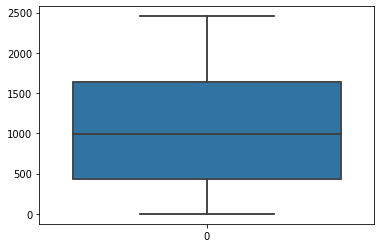

In [119]:
## 이상치 제거

sns.boxplot(data = join_ent_other_set["watt"])


import pandas as pd
from scipy import stats

# deleteoutlier = stats.zscore(join_ent_other_set["watt"])
# deleteoutlier
deleteoutlier = stats.zscore(join_ent_other_set["watt"])
join_ent_other_set["z_score"] = deleteoutlier

join_ent_other_del = join_ent_other_set.loc[join_ent_other_set['z_score'].abs()<=3]
sns.boxplot(data = join_ent_other_del["watt"])
print(join_ent_other_del['z_score'].max())
print(join_ent_other_del['z_score'].min())

## 다시저장
join_ent_other_del.to_csv('NewREC1_join.csv', encoding='utf-8')


In [133]:
to_day = join_ent_other_del.reset_index()
date_list = pd.to_datetime(to_day["index"])
to_day.index = date_list
to_day_need = to_day[["env_slopesolar", "env_levelsolar", "watt", "match_solar"]]

to_day_sum = to_day_need.resample('D').sum()
to_day_need
to_day_sum

,env_slopesolar,env_levelsolar,watt,match_solar
index,,,,
2018-11-19,290.234783,456.875362,1228.937531,655.555556
2018-11-20,3005.238716,4434.791718,11037.314181,3338.888889
2018-11-21,1475.662526,1759.804141,4678.347927,1366.666667
2018-11-22,2928.398344,4315.495445,11301.712195,3275.000000
2018-11-23,2685.091304,3900.351967,10083.793390,3050.000000
...,...,...,...,...
2020-10-18,4611.587821,3780.987286,11609.828889,4183.333333
2020-10-19,2329.964467,1957.952403,5730.114325,3113.888889
2020-10-20,4613.143990,3759.502462,11136.229707,4038.888889


In [121]:
join_ent_other_del.describe()

,env_slopesolar,env_levelsolar,env_modtemp,env_airtemp,pow_dcv,pow_dca,watt,기온,강수량,풍속,풍향,습도,일조,일사,적설,전운량,지중온도,match_solar,z_score
count,3495.000000,3495.000000,3495.000000,3495.000000,3495.000000,3495.000000,3495.000000,3495.000000,3495.000000,3495.000000,3495.000000,3495.000000,3495.000000,3495.000000,3495.000000,3495.000000,3495.000000,3495.000000,3.495000e+03
mean,477.522995,445.457021,27.284973,18.443744,149.080315,7.155414,1035.753043,17.284835,0.181917,4.123605,226.440629,63.635193,0.620029,1.651153,0.022661,5.773391,16.783205,458.653632,6.229320e-17
std,281.913806,265.642498,13.363323,9.670902,11.750980,4.853407,682.567188,9.248520,1.337570,2.129684,124.601163,16.192883,0.428719,0.889810,0.277111,3.538509,8.647755,247.169569,1.000143e+00
min,0.000000,0.000000,-5.447059,-6.160294,119.614286,0.000000,0.000000,-4.300000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.517655e+00
25%,222.888575,218.825827,16.894761,9.903709,141.213853,2.901538,428.958445,8.800000,0.000000,2.600000,140.000000,53.000000,0.100000,0.910000,0.000000,3.000000,8.350000,252.777778,-8.891160e-01
50%,477.000000,431.515625,27.464063,20.140625,146.666667,6.620000,986.140741,19.600000,0.000000,3.700000,270.000000,63.000000,0.900000,1.640000,0.000000,7.000000,18.600000,455.555556,-7.269526e-02
75%,708.726562,656.769231,38.118873,26.034867,156.396942,11.233052,1638.009375,24.800000,0.000000,5.300000,340.000000,75.000000,1.000000,2.340000,0.000000,9.000000,24.300000,650.000000,8.824663e-01
max,1051.529412,1051.100000,56.115789,40.056923,188.784615,17.844444,2453.830000,33.500000,33.200000,14.000000,360.000000,100.000000,1.000000,3.690000,5.200000,10.000000,31.400000,1025.000000,2.077861e+00


In [122]:
join_ent_other_del.corr()

,env_slopesolar,env_levelsolar,env_modtemp,env_airtemp,pow_dcv,pow_dca,watt,기온,강수량,풍속,풍향,습도,일조,일사,적설,전운량,지중온도,match_solar,z_score
env_slopesolar,1.000000,0.967800,0.700674,0.413527,0.121995,0.702244,0.692260,0.200265,-0.183401,-0.109035,0.079922,-0.391761,0.544103,0.724368,-0.057795,-0.498597,0.150014,0.724368,0.692260
env_levelsolar,0.967800,1.000000,0.778147,0.530953,0.070700,0.688413,0.672243,0.330961,-0.175102,-0.157613,0.081256,-0.340265,0.493949,0.746969,-0.064944,-0.428896,0.275793,0.746969,0.672243
env_modtemp,0.700674,0.778147,1.000000,0.923832,-0.240397,0.540371,0.493253,0.806600,-0.065602,-0.323816,0.091856,-0.011307,0.251773,0.614659,-0.164855,-0.162190,0.731291,0.614659,0.493253
env_airtemp,0.413527,0.530953,0.923832,1.000000,-0.368007,0.376304,0.325895,0.952439,0.007187,-0.322630,0.070258,0.164148,0.062949,0.441120,-0.173201,0.036748,0.876197,0.441120,0.325895
pow_dcv,0.121995,0.070700,-0.240397,-0.368007,1.000000,-0.369924,-0.318611,-0.449928,-0.098622,0.181792,-0.045806,-0.303245,0.144006,0.077421,-0.029591,-0.217240,-0.463621,0.077421,-0.318611
pow_dca,0.702244,0.688413,0.540371,0.376304,-0.369924,1.000000,0.995375,0.260748,-0.148230,-0.149529,0.041096,-0.213584,0.406996,0.488889,-0.100709,-0.336062,0.231039,0.488889,0.995375
watt,0.692260,0.672243,0.493253,0.325895,-0.318611,0.995375,1.000000,0.209068,-0.152377,-0.130778,0.028034,-0.237733,0.417097,0.478211,-0.101887,-0.353932,0.179487,0.478211,1.000000
기온,0.200265,0.330961,0.806600,0.952439,-0.449928,0.260748,0.209068,1.000000,0.051352,-0.282917,0.068920,0.237647,-0.021053,0.341930,-0.165790,0.131764,0.926867,0.341930,0.209068
강수량,-0.183401,-0.175102,-0.065602,0.007187,-0.098622,-0.148230,-0.152377,0.051352,1.000000,0.017671,-0.099440,0.253116,-0.192270,-0.212333,0.004264,0.161484,0.082391,-0.212333,-0.152377
풍속,-0.109035,-0.157613,-0.323816,-0.322630,0.181792,-0.149529,-0.130778,-0.282917,0.017671,1.000000,0.145066,-0.098864,0.082632,-0.002448,0.071435,-0.057857,-0.208998,-0.002448,-0.130778


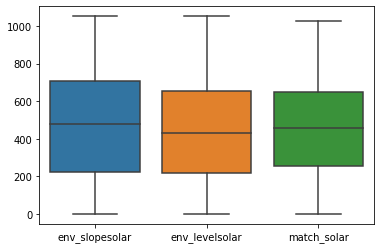

In [123]:
sns.boxplot(data = join_ent_other_del[["env_slopesolar", "env_levelsolar", "match_solar"]])

In [124]:
import scipy.stats

print(
    scipy.stats.pearsonr(join_ent_other_del["env_levelsolar"], join_ent_other_del["match_solar"]), 
    scipy.stats.pearsonr(join_ent_other_del["env_slopesolar"], join_ent_other_del["match_solar"]))
print("------------------")
print(
    scipy.stats.pearsonr(join_ent_other_del["env_levelsolar"], join_ent_other_del["watt"]), 
    scipy.stats.pearsonr(join_ent_other_del["env_slopesolar"], join_ent_other_del["watt"]), 
    scipy.stats.pearsonr(join_ent_other_del["match_solar"], join_ent_other_del["watt"]))

(0.7469693276833885, 0.0) (0.7243684799601062, 0.0)
------------------
(0.6722429847065838, 0.0) (0.6922596763831287, 0.0) (0.4782110608703029, 3.1605734784012665e-199)


In [125]:
import statsmodels.api as sm

Y = join_ent_other_del["watt"]
X = join_ent_other_del["env_slopesolar"]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
# results.summary()

X2 = join_ent_other_del["match_solar"]
model2 = sm.OLS(Y,X2)
results1 = model2.fit()


print(results.summary())
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                   watt   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     3214.
Date:                Tue, 03 Nov 2020   Prob (F-statistic):               0.00
Time:                        19:57:13   Log-Likelihood:                -26626.
No. Observations:                3495   AIC:                         5.326e+04
Df Residuals:                    3493   BIC:                         5.327e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            235.3801     16.393     14.

In [126]:

def mean_absolute_percentage_error(y_true, y_pred):

    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # print(np.mean(np.abs((y_true - y_pred) / y_true)))
    b = np.abs((y_true - y_pred) / y_true)

    # return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    return b


# join_ent_other_set["env_slopeoslar"]
bb = join_ent_other_set[join_ent_other_del["env_slopesolar"] != 0 ]
bb = bb[bb["env_levelsolar"] != 0 ]
bb = bb[bb["match_solar"] != 0 ]
bb = bb[bb["일사"] != 0 ]

x = mean_absolute_percentage_error(bb["env_levelsolar"], bb["match_solar"])

xd = np.array(x)
np.percentile(xd, [0, 25, 50, 75, 100])

df = pd.DataFrame(sorted(xd))
df.quantile(0.75)


dfdf = df.iloc[1500:3500]

(dfdf.mean())
# df_set = df.loc[df.quantile(0.25):df.quantile(0.75)]
# sns.boxplot(data=x)
## X : 기업 일사량, Y : 공공 일사량
# join_ent_other_del["env_levelsolar"]
# join_ent_other_del["match_solar"]

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = join_ent_other_del["env_levelsolar"].to_numpy()
X_t = X.reshape(-1, 1)
Y = join_ent_other_del["match_solar"].to_numpy()
Y_t = Y.reshape(-1, 1)

X_0 = bb["env_levelsolar"].to_numpy()
X_t_0 = X_0.reshape(-1, 1)
Y_0 = bb["match_solar"].to_numpy()
Y_t_0 = Y_0.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X_t, Y_t, test_size = 0.25, shuffle=True, random_state = 42)
X_0_train, X_0_test, Y_0_train, Y_0_test = train_test_split(X_t_0, Y_t_0, test_size = 0.25, shuffle=True, random_state = 42)

X_t_0

my_model = LinearRegression()
my_model.fit(X_train,Y_train)
predY_in = my_model.predict(X_train)
predY_out = my_model.predict(X_test)

# print(predY_out)
## Y, predY_out 을 비교하면 공공일사량과, 기업일사량으로 표시한 공공일사량 확인 가능

## 먼저 mse
print("mse", metrics.mean_absolute_error(Y_test, predY_out))  ## inf 가 나온다, 왜? 중간에 0 값들이 껴있기 때문이라고 봄


## 다음 mape y_true : 공공일사량, y_pred : 기업일사량으로 표시한 공공일사량 
def mean_absolute_percentage_error(y_true, y_pred):

    y_true, y_pred = np.array(y_true), np.array(y_pred)


    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("mape", mean_absolute_percentage_error(Y_test, predY_out))

## 이것 또한 inf 가 나온다 0 값때문인 거 같다. 
## => 0 값을 제거한 값을 넣어 보자 ;

my_model_del0 = LinearRegression()
my_model_del0.fit(X_0_train, Y_0_train)
predY0_in = my_model.predict(X_0_train)
predY0_out = my_model.predict(X_0_test)

print("mse", metrics.mean_absolute_error(Y_0_test, predY0_out))
print("mape", mean_absolute_percentage_error(Y_0_test, predY0_out))

mse 134.20157431772427
mape inf
mse 134.00355967620558
mape 55.93302226382251


In [127]:
## 언제 match_solar와 env_levelsolar 가 차이가 많이 나는지를 봐보자 
diff = (((join_ent_other_del["env_levelsolar"] - join_ent_other_del["match_solar"])) / join_ent_other_del["match_solar"]) * 100
diff2 = (join_ent_other_del["env_levelsolar"] - join_ent_other_del["env_slopesolar"])
diff3 = diff + diff2 

join_ent_other_del["diff"] = diff
join_ent_other_del["diff2"] = diff2
join_ent_other_del["diff3"] = diff3

df_diff = join_ent_other_del[["env_levelsolar","env_slopesolar", "match_solar", "diff", "diff2", "diff3"]]
df_diff.describe()


df_diff[df_diff["diff"] == df_diff["diff"].max()]

df_diff[df_diff["match_solar"] == 0]


fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=df_diff.index, y=df_diff["env_levelsolar"], mode='lines', name="기업", line=dict(color='blue')), secondary_y = False)
fig.add_trace(go.Scatter(x=df_diff.index, y=df_diff["match_solar"], mode='lines', name="기상청", line=dict(color='red')), secondary_y = True)
fig.update_layout(width=1000, height=300,)
fig.show()

df_diff.describe()

#  2020 10 10 16:00
# 발전소 센서 가끔 다운, 오작동 -> 소거 
# 1주일 별 시간 별 평균 평균 ,,
 
# 10: 14
print(mean_absolute_percentage_error(bb["env_levelsolar"], bb["match_solar"]))

75.71098596619146


In [128]:
fig = make_subplots(specs=[[{"secondary_y": True}]])


fig.add_trace(go.Scatter(x=to_day_sum.index, y=to_day_sum["env_levelsolar"], mode='lines', name="기업", line=dict(color='blue')), secondary_y = False)
fig.add_trace(go.Scatter(x=to_day_sum.index, y=to_day_sum["match_solar"], mode='lines', name="기상청", line=dict(color='red')), secondary_y = True)
fig.update_layout(width=1000, height=300,)
fig.show()

In [134]:
del_nan = to_day_sum[to_day_sum["env_levelsolar"] != 0 ]
del_nan = del_nan[del_nan["match_solar"] != 0 ]



mean_absolute_percentage_error(del_nan["env_levelsolar"], del_nan["match_solar"] ) 

diff = (del_nan["env_levelsolar"] - del_nan["match_solar"]) / del_nan["env_levelsolar"]
del_nan["diff"] = diff

fig = make_subplots(specs=[[{"secondary_y": True}]])

del_nan["diff"]
fig.add_trace(go.Scatter(x=to_day_sum.index, y=del_nan["diff"], mode='lines', name="기업", line=dict(color='blue')), secondary_y = False)
# fig.add_trace(go.Scatter(x=to_day_sum.index, y=to_day_sum["match_solar"], mode='lines', name="기상청", line=dict(color='red')), secondary_y = True)
fig.update_layout(width=1000, height=300,)
fig.show()

In [137]:
## 이상치 제거




import pandas as pd
from scipy import stats

# deleteoutlier = stats.zscore(join_ent_other_set["watt"])
# deleteoutlier
deleteoutlier = stats.zscore(del_nan["diff"])
del_nan["z_score"] = deleteoutlier

del_nan_z = del_nan.loc[del_nan['z_score'].abs()<=2]
# sns.boxplot(data = del_nan_z["diff"])
print(len(del_nan_z), len(del_nan))


## 다시저장
fig = make_subplots(specs=[[{"secondary_y": True}]])

del_nan["diff"]
fig.add_trace(go.Scatter(x=to_day_sum.index, y=del_nan_z["diff"], mode='lines', name="기업", line=dict(color='blue')), secondary_y = False)
# fig.add_trace(go.Scatter(x=to_day_sum.index, y=to_day_sum["match_solar"], mode='lines', name="기상청", line=dict(color='red')), secondary_y = True)
fig.update_layout(width=1000, height=300,)
fig.show()


mean_absolute_percentage_error(del_nan_z["env_levelsolar"], del_nan_z["match_solar"] ) 


510 525


21.200093150977004